<img align="right" style="padding-left:10px; height: 30%; width: 30%" src="figures/whr.png" >

# World Happiness Report

This case study is based on the 7th World Happiness Report. The first was released in April 2012 in support of a UN High level meeting on “Wellbeing and Happiness: Defining a New Economic Paradigm”. 

That 2012 report presented the available global data on national happiness and reviewed related evidence from the emerging science of happiness, showing that the quality of people’s lives can be coherently, reliably, and validly assessed by a variety of subjective well-being measures, collectively referred to then and in subsequent reports as “happiness.” 

This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

I have downloaded the data from [Chapter 2: Online Data](https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls) and filtered out data prior to 2018. The result is available in CSV format, as the next cell shows. _Data Prep Notes:_ The Happiness Score column is from Figure 2.6 in the downloaded report; the other data columns are from Table 2.1 in the same report. If a country wasn't in either list, it wasn't included in the CSV file.

In [4]:
import pandas as pd
data1 = pd.read_csv('happiness-report.csv')
data1

,Country,Year,HappinessScore,LifeLadder,LogGDP,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect,ConfidenceInNationalGovernment
0,Afghanistan,2018,3.203,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,0.364666
1,Albania,2018,4.719,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338
2,Algeria,2018,5.211,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946,NaN
3,Argentina,2018,6.086,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352
4,Armenia,2018,4.559,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828
5,Australia,2018,7.228,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837
6,Austria,2018,7.246,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,0.226059,0.488679
7,Azerbaijan,2018,5.208,5.167995,9.678014,0.781230,65.500000,0.772449,-0.251795,0.561206,0.592575,0.191392,0.834372
8,Bangladesh,2018,4.456,4.499217,8.220746,0.705556,64.300003,0.901471,-0.038008,0.701421,0.541345,0.361238,0.831693
9,Belarus,2018,5.323,5.233770,9.778739,0.904569,66.099998,0.643602,-0.181865,0.718455,0.450333,0.235729,0.421279


## Some observations:

* **Quality** Some data points, e.g., Generosity for Yemen are unavailable. This is typically done using `dropna()` as shown below.

* **Normalization:** The columns have different ranges: some values are between 0. and 1., Generosity is between -0.33 and 0.49, and so on. The data needs to be preprocessed so as to be uniform. The process of making all columns uniform in scale is referred to as **Feature Scaling**. Many data analysis libraries require it (see [_The Importance of Feature Scaling_](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)). Scikit-Learn offers an extensive library for [preprocessing data](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). Pay particular attention to `*Scaler()` functions. Also Discretizers such as Binarizer, KBinsDiscretizer and QuantileTransformer.

* **Pre-normalization:** `LogGDP` is the logarithm of the GDP per capita. Here is a case where the data has gone through Feature Scaling _prior to publication!_ Taking a log of numbers whose range spans multiple orders of magnitude is a common technique for compressing the range. However, it still doesn't span the range [0. 1.] and a bit more Feature Scaling is required.

In [5]:
# Get a sense of data quality
data1_not_na = data1.dropna()
data1_good_or_na = pd.merge(data1, data1_not_na, indicator=True, how='left')
# _good_or_na has a new column '_merge' which has values 'left_only' or 'both'. Pick 'left_only'
data1_na = data1_good_or_na.query('_merge=="left_only"').drop('_merge', axis=1)
data1_na

,Country,Year,HappinessScore,LifeLadder,LogGDP,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect,ConfidenceInNationalGovernment
2,Algeria,2018,5.211,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946,NaN
18,Burundi,2018,3.775,3.775283,6.541033,0.484715,53.400002,0.646399,-0.019334,0.598608,0.666442,0.362767,NaN
19,Cambodia,2018,4.700,5.121838,8.253352,0.794605,61.599998,0.958305,0.033787,NaN,0.844593,0.414346,NaN
24,China,2018,5.191,5.131434,9.694376,0.787605,69.300003,0.895378,-0.174899,NaN,0.855784,0.189640,NaN
30,Cyprus,2018,6.046,6.276443,NaN,0.825573,73.699997,0.794215,NaN,0.848337,0.750122,0.298021,0.352440
35,Egypt,2018,4.166,4.005451,9.293960,0.758824,61.700001,0.681654,-0.222930,NaN,0.492261,0.285184,NaN
42,Gambia,2018,4.516,4.922099,7.376554,0.684800,55.000000,0.718729,NaN,0.691070,0.804012,0.379208,0.757543
58,Jordan,2018,4.906,4.638934,9.024435,0.799544,66.800003,0.762420,-0.183490,NaN,NaN,NaN,NaN
61,Kosovo,2018,6.100,6.391826,NaN,0.822407,65.149826,0.889737,NaN,0.922078,0.778271,0.170248,0.347547
63,Laos,2018,4.796,4.859402,8.813603,0.704738,58.700001,0.906661,0.140599,0.634240,0.852214,0.331883,NaN


### Fill

`data_na` has some rows _we don't want to reject._ For example, **China** and **Saudi Arabia**. Investigating China, we examine `data_na.loc[24]` and find the offending columns:
```
    PerceptionsOfCorruption                NaN
    ConfidenceInNationalGovernment         NaN
```
Examining `data1.mean()`, we find (among others), average values of _certain_ columns which we could "fill" with the averages below. We don't, however, want to fill in quantitative measures such as LogGDP.
```
    SocialSupport                        0.810544
    FreedomToMakeLifeChoices             0.784535
    Generosity                          -0.029086
    PerceptionsOfCorruption              0.731744
    PositiveAffect                       0.709628
    NegativeAffect                       0.293670
    ConfidenceInNationalGovernment       0.495120
```
**Note:** The decision to fill some of the columns _but not others_ may appear arbitrary to a reviewer. This is a good place to justify it.

In [6]:
# Fill some of the columns with the mean values and get a sense of data quality of the new data
means = data1.mean()
# Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
data2 = data1.fillna(value = { k:means[k] for k in means.keys() if k not in ['LogGDP']} )
data2

,Country,Year,HappinessScore,LifeLadder,LogGDP,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect,ConfidenceInNationalGovernment
0,Afghanistan,2018,3.203,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,0.364666
1,Albania,2018,4.719,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338
2,Algeria,2018,5.211,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946,0.495120
3,Argentina,2018,6.086,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352
4,Armenia,2018,4.559,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828
5,Australia,2018,7.228,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837
6,Austria,2018,7.246,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,0.226059,0.488679
7,Azerbaijan,2018,5.208,5.167995,9.678014,0.781230,65.500000,0.772449,-0.251795,0.561206,0.592575,0.191392,0.834372
8,Bangladesh,2018,4.456,4.499217,8.220746,0.705556,64.300003,0.901471,-0.038008,0.701421,0.541345,0.361238,0.831693
9,Belarus,2018,5.323,5.233770,9.778739,0.904569,66.099998,0.643602,-0.181865,0.718455,0.450333,0.235729,0.421279


In [7]:
# As above, we should get a sense of the quality of the data now.
data2 = data2.dropna()
pd_data = data2.drop(['Country', 'Year'], axis=1)
np_data = pd_data.to_numpy()
# print (len(pd_data))
# print (numpy.isnan(pd_data).any()) # Any NaN values left?
np_cols = list(pd_data)
np_rows = list(data2['Country'])

def reconstruct_pd(np_data, np_rows, np_cols):
    return pd.concat([
        pd.DataFrame(np_rows, columns=['Country']), 
        pd.DataFrame(np_data, dtype='float32', columns=np_cols)], axis=1)

reconstruct_pd(np_data, np_rows, np_cols)

,Country,HappinessScore,LifeLadder,LogGDP,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect,ConfidenceInNationalGovernment
0,Afghanistan,3.203,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,0.364666
1,Albania,4.719,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338
2,Algeria,5.211,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946,0.495120
3,Argentina,6.086,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352
4,Armenia,4.559,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828
5,Australia,7.228,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837
6,Austria,7.246,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,0.226059,0.488679
7,Azerbaijan,5.208,5.167995,9.678014,0.781230,65.500000,0.772449,-0.251795,0.561206,0.592575,0.191392,0.834372
8,Bangladesh,4.456,4.499217,8.220746,0.705556,64.300003,0.901471,-0.038008,0.701421,0.541345,0.361238,0.831693
9,Belarus,5.323,5.233770,9.778739,0.904569,66.099998,0.643602,-0.181865,0.718455,0.450333,0.235729,0.421279


In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = StandardScaler()
np_norm = scaler.fit_transform(np_data)
reconstruct_pd(np_norm, np_rows, np_cols)

,Country,HappinessScore,LifeLadder,LogGDP,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect,ConfidenceInNationalGovernment
0,Afghanistan,-2.019505,-2.551520,-1.485569,-2.526380,-1.799854,-3.499283,-0.359735,1.087317,-2.628350,1.268071,-0.694985
1,Albania,-0.642061,-0.442753,0.137071,-1.044773,0.630625,0.337264,0.222222,0.925847,0.016003,0.268569,-0.323426
2,Algeria,-0.195028,-0.407441,0.260222,-0.076593,0.207934,-1.712902,-0.923980,0.129587,-1.101972,-0.034526,-0.009117
3,Argentina,0.600001,0.276930,0.473453,0.775471,0.645722,0.521843,-1.146541,0.677065,0.994557,0.286083,-1.238163
4,Armenia,-0.787438,-0.389766,-0.110812,0.056338,0.358895,0.196217,-0.773745,-0.334688,-1.189350,1.849055,0.914672
5,Australia,1.637627,1.540489,1.244282,1.113954,1.370337,1.118879,1.075826,-1.878035,0.434083,-1.261851,-0.147304
6,Austria,1.653981,1.740411,1.261942,0.874397,1.279760,1.017438,0.519847,-1.206593,0.373103,-0.812727,-0.042984
7,Azerbaijan,-0.197754,-0.293418,0.361805,-0.223187,0.147549,-0.103387,-1.435730,-0.990293,-1.087959,-1.216065,1.774513
8,Bangladesh,-0.881024,-0.903910,-0.871174,-0.859952,-0.033604,0.994955,-0.057519,-0.195226,-1.556438,0.760027,1.760429
9,Belarus,-0.093264,-0.233376,0.447027,0.814663,0.238126,-1.200243,-0.984912,-0.098636,-2.388695,-0.700222,-0.397343


In [9]:
# This cell is referred to as "The Clustering Cell" in the discussion below. It's where the data are clustered.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(np_norm)
kmeans.labels_

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int32)

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import column_or_1d

class OrderedLabelEncoder(LabelEncoder):
# Reference: https://stackoverflow.com/questions/58893912/
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self

ole2 = OrderedLabelEncoder()
ole2.fit([0, 1])
#ole2.fit(['zero', 'one'])
#print (ole2.inverse_transform([0, 0, 0, 1, 1, 1]))
#ole3 = OrderedLabelEncoder()
#ole3.fit(['one', 'zero'])
#print (ole3.inverse_transform([0, 0, 0, 1, 1, 1]))
#ole4 = LabelEncoder()
#ole4.fit(['nil', 'one'])
#print (ole4.inverse_transform([0, 0, 0, 1, 1, 1]))
# print ( le.classes_)

def clustered_pd(np_data, np_rows, np_cols, labels, ole):
    return pd.concat([
        pd.DataFrame(np_rows, columns=['Country']), 
        pd.DataFrame(ole.inverse_transform(labels), columns=['Cluster']), 
        pd.DataFrame(np_data, dtype='float32', columns=np_cols)], axis=1)

# Uncomment the next line to help discover candidates for the labeling clusters
# print (clustered_pd(np_norm, np_rows, np_cols, kmeans.labels_, ole2).loc[:,['Country', 'Cluster']])
# I ran it once, then came up with the emojis below

In [11]:
# Replace labels with emojis
ole = OrderedLabelEncoder()
ole.fit(['\U0001F626', '\U0001F601'])

clustered_pd(np_norm, np_rows, np_cols, kmeans.labels_, ole)

,Country,Cluster,HappinessScore,LifeLadder,LogGDP,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect,ConfidenceInNationalGovernment
0,Afghanistan,😦,-2.019505,-2.551520,-1.485569,-2.526380,-1.799854,-3.499283,-0.359735,1.087317,-2.628350,1.268071,-0.694985
1,Albania,😦,-0.642061,-0.442753,0.137071,-1.044773,0.630625,0.337264,0.222222,0.925847,0.016003,0.268569,-0.323426
2,Algeria,😦,-0.195028,-0.407441,0.260222,-0.076593,0.207934,-1.712902,-0.923980,0.129587,-1.101972,-0.034526,-0.009117
3,Argentina,😁,0.600001,0.276930,0.473453,0.775471,0.645722,0.521843,-1.146541,0.677065,0.994557,0.286083,-1.238163
4,Armenia,😦,-0.787438,-0.389766,-0.110812,0.056338,0.358895,0.196217,-0.773745,-0.334688,-1.189350,1.849055,0.914672
5,Australia,😁,1.637627,1.540489,1.244282,1.113954,1.370337,1.118879,1.075826,-1.878035,0.434083,-1.261851,-0.147304
6,Austria,😁,1.653981,1.740411,1.261942,0.874397,1.279760,1.017438,0.519847,-1.206593,0.373103,-0.812727,-0.042984
7,Azerbaijan,😁,-0.197754,-0.293418,0.361805,-0.223187,0.147549,-0.103387,-1.435730,-0.990293,-1.087959,-1.216065,1.774513
8,Bangladesh,😦,-0.881024,-0.903910,-0.871174,-0.859952,-0.033604,0.994955,-0.057519,-0.195226,-1.556438,0.760027,1.760429
9,Belarus,😁,-0.093264,-0.233376,0.447027,0.814663,0.238126,-1.200243,-0.984912,-0.098636,-2.388695,-0.700222,-0.397343


<img align="right" style="padding-left:10px; height: 50%; width: 50%" src="figures/image001.png" >

## Judgment Factors

### Treatment of Outliers

Outliers can influence the clustering result. Removing outliers is an essential part of prepping the data for cluster analysis.

Outliers represent experimental error or other spurious results (referred to as _artifacts_ in microbiology literature). In other applications, they are _most valuable_ such as when looking for criminal activity patterns in e-commerce data See [Novelty and Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html) library in Scikit-Learn.

_In other words, removing outliers isn't always desirable!_


<img align="right" style="padding-left:10px; height: 50%; width: 50%" src="figures/image003.png" >

### Randomness of seed selection

As the accompanying diagrams show, the k-means algorithm is subject to the randomness of seed selection, which can play a significant role in the results of clustering. 

<img align="right" style="padding-left:10px; height: 50%; width: 50%" src="figures/image005.png" >

To counter the effects of this randomness, modifications to the algorithm have been proposed, the most well-known of them being [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). K-means++ implementations are available in most libraries (including Scikit-Learn).

_Most of the time you want to use K-means++._

### Data suitable for K-means 

The K-means algorithm works well for data that are "ellipsoidal" in shape.

<img align="right" style="padding-left:10px; height: 50%; width: 50%" src="figures/image007.png" >

The data shown here don't lend themselves to be clustered into ellipsoids. Figure B represents the best that can be achieved with this algorithm.

### Parity of Cluster Sizes

<img align="right" style="padding-left:10px; height: 70%; width: 70%" src="figures/500px-mouse.png" >

There is no assumption in standard K-means algorithms that assumes an equal number of points in each cluster. However, certain standard algorithms do have a tendency towards _equalizing the spatial variance of clusters,_ which can result in a (rough) tendency towards equality of cluster sizes in cases where there is overlap between the clusters &mdash; [source](https://stats.stackexchange.com/a/326715).

Notice how the clusters chosen by K-means bleed into each other more than in the original data. Other methods, such as the [Expectation–maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) labeled EM Clustering in the figure, fare better in this case.

### Assigning Cluster Labels

We were able to come up with emojis for the values 0 and 1 with some confidence. But this approach isn't fool-proof. What could possibly go wrong? The allocation of labels 0 and 1 is arbitrary. The labels could be switched the next time the clustering cell is run! To counter this possibility, the labeling was done as a separate step _after_ the clustering had been run.

### For further reading

[k-Means Advantages and Disadvantages](https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages) &mdash; from Machine Learning Crash Course by Google.

In [12]:
from sklearn.cluster import KMeans
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(np_norm)
kmeans.labels_

array([2, 1, 3, 4, 1, 0, 0, 1, 1, 3, 4, 2, 4, 3, 1, 4, 3, 2, 2, 1, 2, 0,
       2, 4, 4, 4, 2, 2, 4, 3, 4, 0, 4, 4, 3, 4, 4, 1, 0, 4, 3, 2, 3, 0,
       3, 4, 2, 2, 4, 1, 1, 2, 0, 4, 3, 2, 4, 3, 4, 1, 1, 1, 3, 3, 2, 3,
       0, 3, 2, 2, 1, 2, 3, 4, 4, 3, 3, 3, 2, 1, 1, 1, 2, 0, 0, 4, 2, 1,
       0, 2, 4, 4, 1, 4, 4, 3, 1, 4, 1, 3, 2, 4, 4, 1, 3, 4, 1, 1, 0, 0,
       1, 4, 2, 3, 3, 1, 2, 3, 4, 0, 4, 4, 0, 3, 4, 1, 1], dtype=int32)

## Automatically assigning labels

Replace arbitrary numeric labels with descriptive numerical labels for categories. Sometimes it is possible to use some column values to give us a hint about cluster identity. For example, in the data above, Happiness Score could be used to label the rows.

In [13]:
# Replace numeric labels with descriptive labels
ole = OrderedLabelEncoder()
ole.fit(list(range(n_clusters)))
cpd = clustered_pd(np_norm, np_rows, np_cols, kmeans.labels_, ole)

means = cpd.groupby('Cluster')['HappinessScore'].mean()
new_indexes = sorted(range(n_clusters), key=lambda k: means[k])

dd = {new_indexes[i]:i for i in range(5)}
ole = OrderedLabelEncoder()
ole.fit([dd[i] for i in range(5)])

cpd = clustered_pd(np_norm, np_rows, np_cols, kmeans.labels_, ole)
sorted_indexes = cpd.groupby('Cluster')['HappinessScore'].mean().sort_values(ascending=True)

# Confirm that the resulting cluster annotations are in order of average happiness score.

# print (sorted_indexes) 
# Cluster
# 0   -0.934783
# 1   -0.809009
# 2   -0.188633
# 3    0.698260
# 4    1.649559
# Name: HappinessScore, dtype: float32
cpd

,Country,Cluster,HappinessScore,LifeLadder,LogGDP,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect,ConfidenceInNationalGovernment
0,Afghanistan,0,-2.019505,-2.551520,-1.485569,-2.526380,-1.799854,-3.499283,-0.359735,1.087317,-2.628350,1.268071,-0.694985
1,Albania,1,-0.642061,-0.442753,0.137071,-1.044773,0.630625,0.337264,0.222222,0.925847,0.016003,0.268569,-0.323426
2,Algeria,2,-0.195028,-0.407441,0.260222,-0.076593,0.207934,-1.712902,-0.923980,0.129587,-1.101972,-0.034526,-0.009117
3,Argentina,3,0.600001,0.276930,0.473453,0.775471,0.645722,0.521843,-1.146541,0.677065,0.994557,0.286083,-1.238163
4,Armenia,1,-0.787438,-0.389766,-0.110812,0.056338,0.358895,0.196217,-0.773745,-0.334688,-1.189350,1.849055,0.914672
5,Australia,4,1.637627,1.540489,1.244282,1.113954,1.370337,1.118879,1.075826,-1.878035,0.434083,-1.261851,-0.147304
6,Austria,4,1.653981,1.740411,1.261942,0.874397,1.279760,1.017438,0.519847,-1.206593,0.373103,-0.812727,-0.042984
7,Azerbaijan,1,-0.197754,-0.293418,0.361805,-0.223187,0.147549,-0.103387,-1.435730,-0.990293,-1.087959,-1.216065,1.774513
8,Bangladesh,1,-0.881024,-0.903910,-0.871174,-0.859952,-0.033604,0.994955,-0.057519,-0.195226,-1.556438,0.760027,1.760429
9,Belarus,2,-0.093264,-0.233376,0.447027,0.814663,0.238126,-1.200243,-0.984912,-0.098636,-2.388695,-0.700222,-0.397343


## TO-DO

Draw scatter plots of 

1. Happiness-Score vs. LogGDP, 
2. Happiness-Score vs. SocialSupport, 
3. Happiness-Score vs. HealthyLifeExpectancyAtBirth and
4. Happiness-Score vs. PerceptionsOfCorruption. 

In each case, label the points with Country and color them according to cluster [0 = red, 1 = orange, 2 = yellow, 3 = lime green, 4 = dark green]

#### <span style="color:blue">Update after the 11/20/19 class</span>

The code for labeling points in a scatter plot was included in <a href="../04-analysis-and-visualization/04-03-clustering/04-03-clustering-notes.ipynb">04-03-clustering notes</a>. You should feel free to use any or all of the following tricks to make the scatter plot look less crowded:

1. Abbreviate each country name to 4 letters,
2. Show only one out of 4 labels. An easy way to do so is skip calling `plt.annotate()` for every point.
3. Make the graph large in size, but not so large that it overflows the width of the notebook!

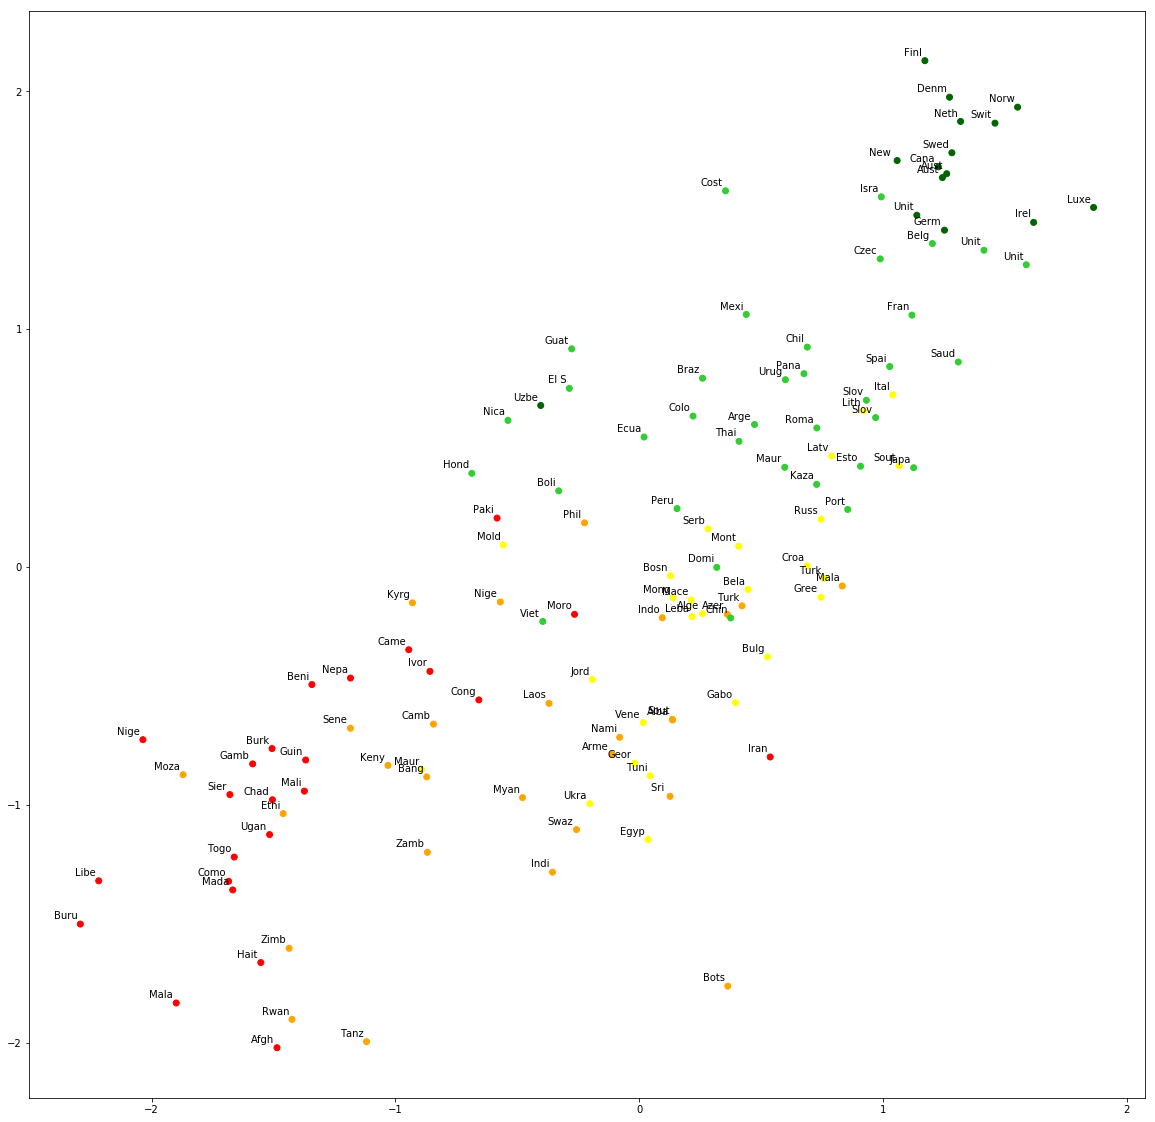

In [14]:
import matplotlib.pyplot as plt

# Compute clusters
color=['red','orange','yellow','limegreen','darkgreen']
# color each cluster with a different color of the rainbow
plt.figure(figsize=(20, 20))
t=[]
for i in range(len(cpd)):
    t.append(color[cpd['Cluster'][i]])
    
plt.scatter(cpd['LogGDP'],cpd['HappinessScore'],c=t,label='True Position')
# Label data points with their letters
for label, x, y in zip(cpd['Country'].str[:4], cpd['LogGDP'],cpd['HappinessScore']):
    plt.annotate(
        label,  # what label to place
        xy=(x, y),  # where the point is (actual coordinates)
        xytext=(-3, 3),  # where the characters should start (pixels)
        textcoords='offset points',  # use the xytext offsets to place text
        ha='right',  # horizontal alignment of text
        va='bottom')  # vertical alignment of text

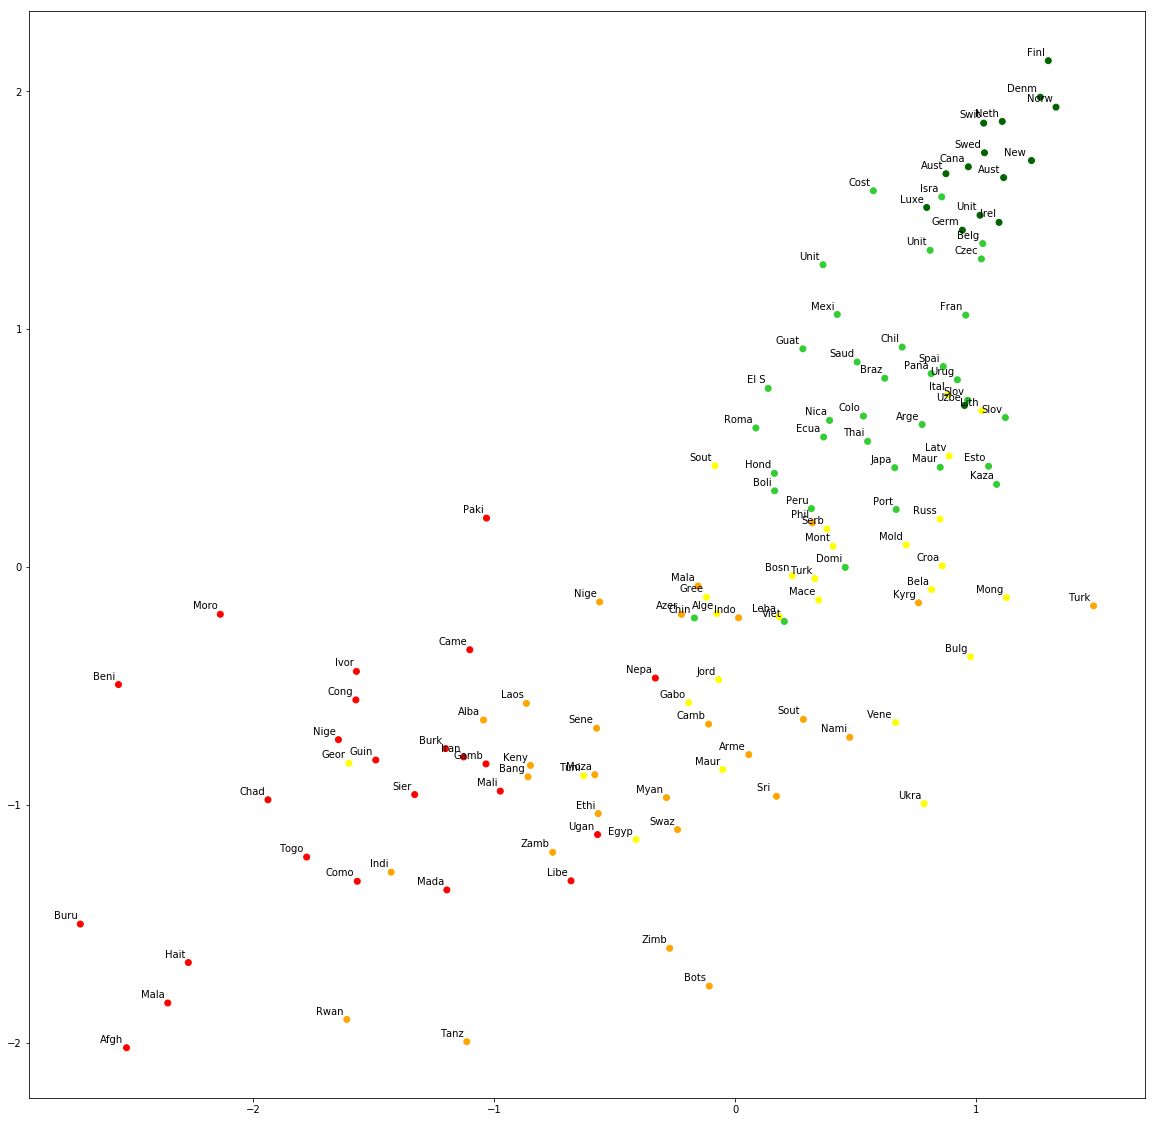

In [15]:
import matplotlib.pyplot as plt

# Compute clusters
color=['red','orange','yellow','limegreen','darkgreen']
# color each cluster with a different color of the rainbow
plt.figure(figsize=(20, 20))
t=[]
for i in range(len(cpd)):
    t.append(color[cpd['Cluster'][i]])
    
plt.scatter(cpd['SocialSupport'],cpd['HappinessScore'],c=t,label='True Position')
# Label data points with their letters
for label, x, y in zip(cpd['Country'].str[:4], cpd['SocialSupport'],cpd['HappinessScore']):
    plt.annotate(
        label,  # what label to place
        xy=(x, y),  # where the point is (actual coordinates)
        xytext=(-3, 3),  # where the characters should start (pixels)
        textcoords='offset points',  # use the xytext offsets to place text
        ha='right',  # horizontal alignment of text
        va='bottom')  # vertical alignment of text

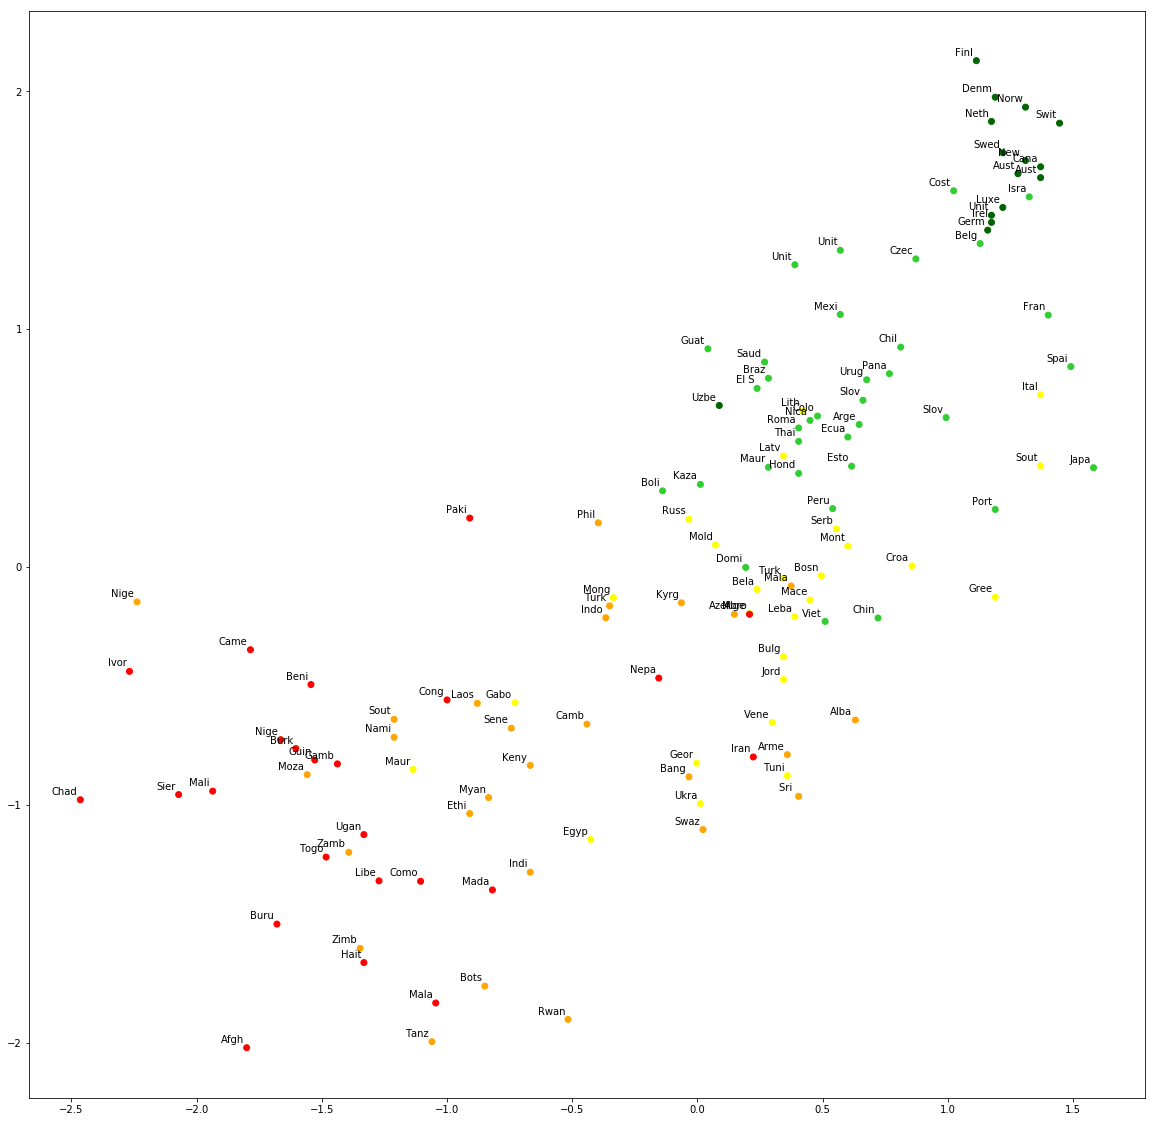

In [23]:
import matplotlib.pyplot as plt

# Compute clusters
color=['red','orange','yellow','limegreen','darkgreen']
# color each cluster with a different color of the rainbow
plt.figure(figsize=(20, 20))
t=[]
for i in range(len(cpd)):
    t.append(color[cpd['Cluster'][i]])
    
plt.scatter(cpd['HealthyLifeExpectancyAtBirth'],cpd['HappinessScore'],c=t,label='True Position')
# Label data points with their letters
for label, x, y in zip(cpd['Country'].str[:4], cpd['HealthyLifeExpectancyAtBirth'],cpd['HappinessScore']):
    plt.annotate(
        label,  # what label to place
        xy=(x, y),  # where the point is (actual coordinates)
        xytext=(-3, 3),  # where the characters should start (pixels)
        textcoords='offset points',  # use the xytext offsets to place text
        ha='right',  # horizontal alignment of text
        va='bottom')  # vertical alignment of text

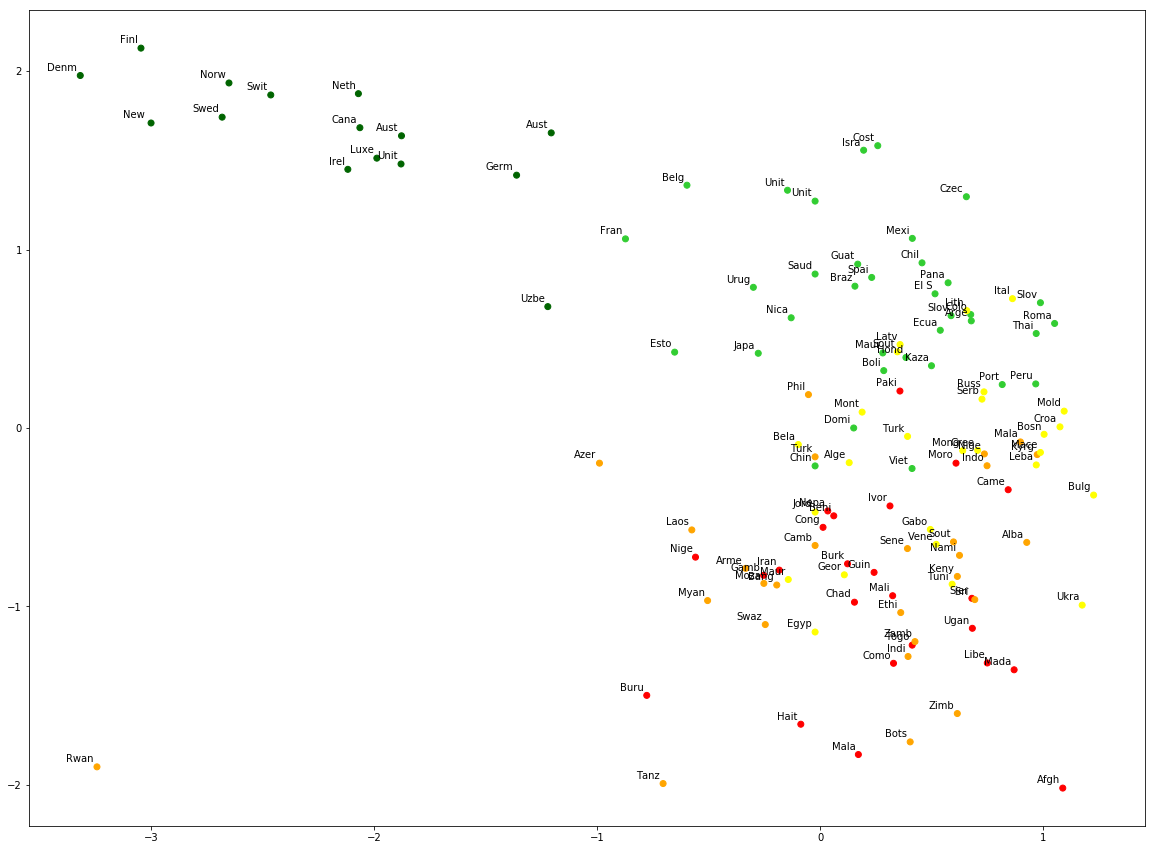

In [24]:
import matplotlib.pyplot as plt

# Compute clusters
color=['red','orange','yellow','limegreen','darkgreen']
# color each cluster with a different color of the rainbow
plt.figure(figsize=(20, 15))
t=[]
for i in range(len(cpd)):
    t.append(color[cpd['Cluster'][i]])
    
plt.scatter(cpd['PerceptionsOfCorruption'],cpd['HappinessScore'],c=t,label='True Position')
# Label data points with their letters
for label, x, y in zip(cpd['Country'].str[:4], cpd['PerceptionsOfCorruption'],cpd['HappinessScore']):
    plt.annotate(
        label,  # what label to place
        xy=(x, y),  # where the point is (actual coordinates)
        xytext=(-3, 3),  # where the characters should start (pixels)
        textcoords='offset points',  # use the xytext offsets to place text
        ha='right',  # horizontal alignment of text
        va='bottom')  # vertical alignment of text
    
    




By visual inspection, how correlated is the happiness score with each parameter?

**Your answer:** ______

Positive Related:
LogGDP
SocialSupport
HealthyLifeExpectancyAtBirth

Negative Related:
PerceptionsOfCorruption


Positive Related means that the higher these parameters are the higher the happiness score would be.
Negative Related means that the lower these parameters are the higher the happiness score would be.


